<a href="https://colab.research.google.com/github/Mithun-mondol/Python/blob/main/Assignment_4_Matplotlib_and_Seaborn_for_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload the Gym data in google drive
'''
from google.colab import files
uploaded = files.upload()
'''

from google.colab import drive #import google Drive
import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive') # Mount to google drive

gym = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/gym_membership.csv', header = 0)

# Display last 5 rows
gym.head()

# Check data types
print(gym.head()) # Display last 5 rows
print(gym.shape) # Display number of rows and columns
print(gym.dtypes) # Display data types
print(gym.describe)
print(gym.columns.tolist()) # Display column names

Mounted at /content/drive
   id  gender    birthday  Age abonoment_type  visit_per_week  \
0   1  Female  1997-04-18   27        Premium               4   
1   2  Female  1977-09-18   47       Standard               3   
2   3    Male  1983-03-30   41        Premium               1   
3   4    Male  1980-04-12   44        Premium               3   
4   5    Male  1980-09-10   44       Standard               2   

        days_per_week  attend_group_lesson            fav_group_lesson  \
0  Mon, Sat, Tue, Wed                 True  Kickboxen, BodyPump, Zumba   
1       Mon, Sat, Wed                False                         NaN   
2                 Sat                 True                       XCore   
3       Sat, Tue, Wed                False                         NaN   
4            Thu, Wed                 True        Running, Yoga, Zumba   

  avg_time_check_in avg_time_check_out  avg_time_in_gym  drink_abo  \
0          19:31:00           21:27:00              116      False  

abonoment_type
Standard    507
Premium     493
Name: count, dtype: int64


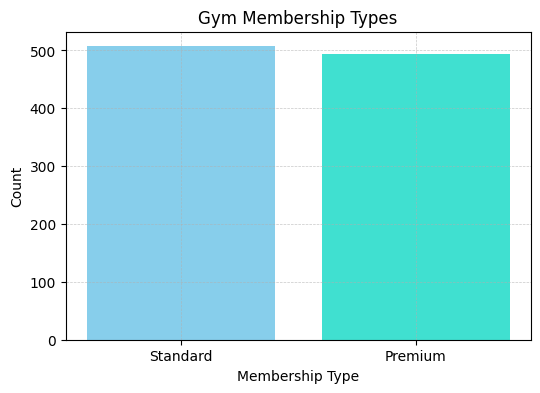

0      116
1       48
2      123
3       99
4       50
      ... 
995    106
996    134
997    152
998    126
999    139
Name: avg_time_in_gym, Length: 1000, dtype: int64


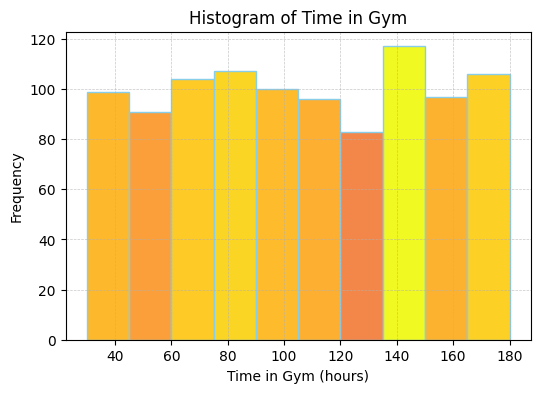

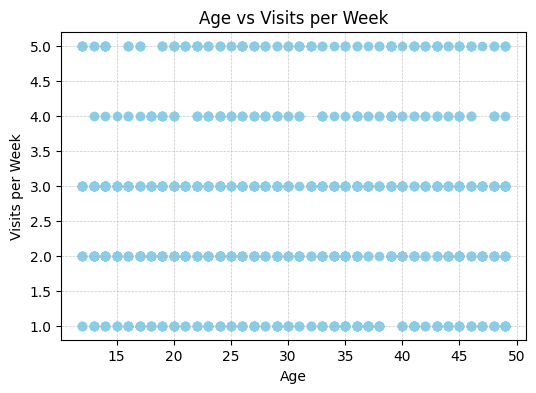

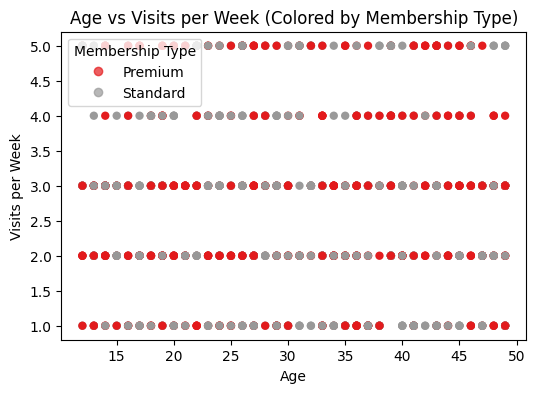

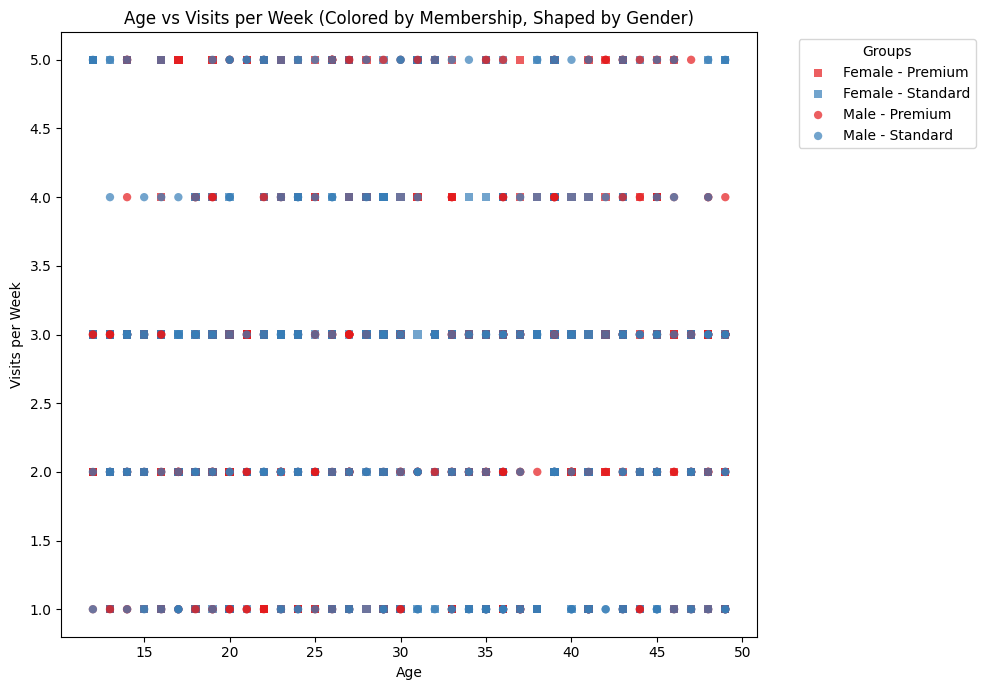

In [11]:
# Task 1: Basic Matplotlib (3 plots)

############## TEST-01 ###############
# 1. Bar chart of gym membership types
# Use: gym['abonoment_type'].value_counts()
gym_membership_types = gym['abonoment_type'].value_counts()
print(gym_membership_types)

# Create a figure size
plt.figure(figsize=(6, 4))

# Add labels and title and grid
plt.title('Gym Membership Types')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, alpha = .7)
plt.xticks(rotation = 0)

# Plot the bar chart
plt.bar(gym_membership_types.index, gym_membership_types.values, color = ['skyblue', 'turquoise'])

# Save the figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Figure/gym_membership_types.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

############## TEST-02 ###############
# 2. Histogram of time in gym
# Use: plt.hist(gym['avg_time_in_gym'])

# Create data set for Histograme
time_in_gym = gym['avg_time_in_gym']
print(time_in_gym)

# Create a figure size
plt.figure(figsize=(6, 4))

# Plot Histograme
counts, bins, patches = plt.hist(time_in_gym, bins = 10)

# Assign different color in each bar
plt.cm.plasma(0, 1, len(patches)) # use Plasma colormap
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.plasma(counts[i] / counts.max()))
    patches[i].set_edgecolor('skyblue')

# Add labels and title and grid
plt.title('Histogram of Time in Gym')
plt.xlabel('Time in Gym (hours)')
plt.ylabel('Frequency')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, alpha = .7)

# Save the figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Figure/avg_time_in_gym.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

# 3. Scatter plot: Age vs visits per week
# Use: plt.scatter(gym['Age'], gym['visit_per_week'])

# Create a figure size
plt.figure(figsize=(6, 4))

# Plot scatter graph
plt.scatter(gym['Age'], gym['visit_per_week'], color = 'skyblue', marker = 'o')

# Add labels and title and grid
plt.title('Age vs Visits per Week')
plt.xlabel('Age')
plt.ylabel('Visits per Week')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, alpha = .7)

# Save figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Figure/age_vs_visits_per_week.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()


####################################################################################################################
# Create a separate figure for scatter plot
plt.figure(figsize = (6,4))

# Scatter plot with color by membership type
scatter = plt.scatter(
    gym['Age'],
    gym['visit_per_week'],
    c = gym['abonoment_type'].astype('category').cat.codes,  # convert text to numeric codes
    cmap = 'Set1',   # colorful colormap
    alpha = 0.99,
    edgecolor = 'none'
)

# Labels and title
plt.title("Age vs Visits per Week (Colored by Membership Type)")
plt.xlabel("Age")
plt.ylabel("Visits per Week")

# Add legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.7)
plt.legend(handles, gym['abonoment_type'].unique(), title="Membership Type")

# Show plot
plt.show()

#########################################################################################################################################################

# Create a separate figure
plt.figure(figsize=(10,7))

# Define marker shapes for gender
markers = {"Male": "o", "Female": "s"}   # Male → circle, Female → square

# Create unique colors for each membership type
membership_types = gym['abonoment_type'].unique()
colors = plt.cm.Set1(range(len(membership_types)))  # colormap

# Map membership type to a color
color_map = dict(zip(membership_types, colors))

# Plot each group (Gender + Membership Type)
for gender in gym['gender'].unique():
    for membership in membership_types:
        subset = gym[(gym['gender'] == gender) & (gym['abonoment_type'] == membership)]
        plt.scatter(
            subset['Age'],
            subset['visit_per_week'],
            color=color_map[membership],
            marker=markers[gender],
            alpha=0.7,
            edgecolor="none",
            label=f"{gender} - {membership}"
        )

# Labels and title
plt.title("Age vs Visits per Week (Colored by Membership, Shaped by Gender)")
plt.xlabel("Age")
plt.ylabel("Visits per Week")

# Show unique legend entries (avoid duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Groups", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


In [7]:
print(gym.columns.tolist())

['id', 'gender', 'birthday', 'Age', 'abonoment_type', 'visit_per_week', 'days_per_week', 'attend_group_lesson', 'fav_group_lesson', 'avg_time_check_in', 'avg_time_check_out', 'avg_time_in_gym', 'drink_abo', 'fav_drink', 'personal_training', 'name_personal_trainer', 'uses_sauna']


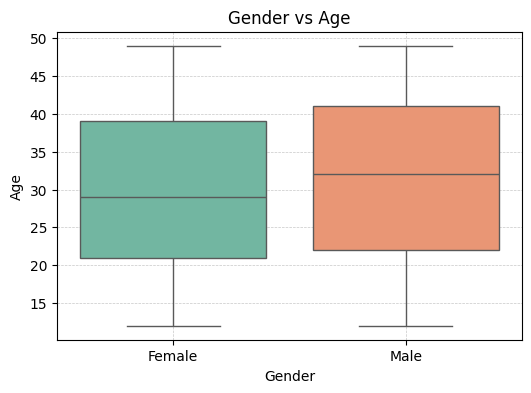

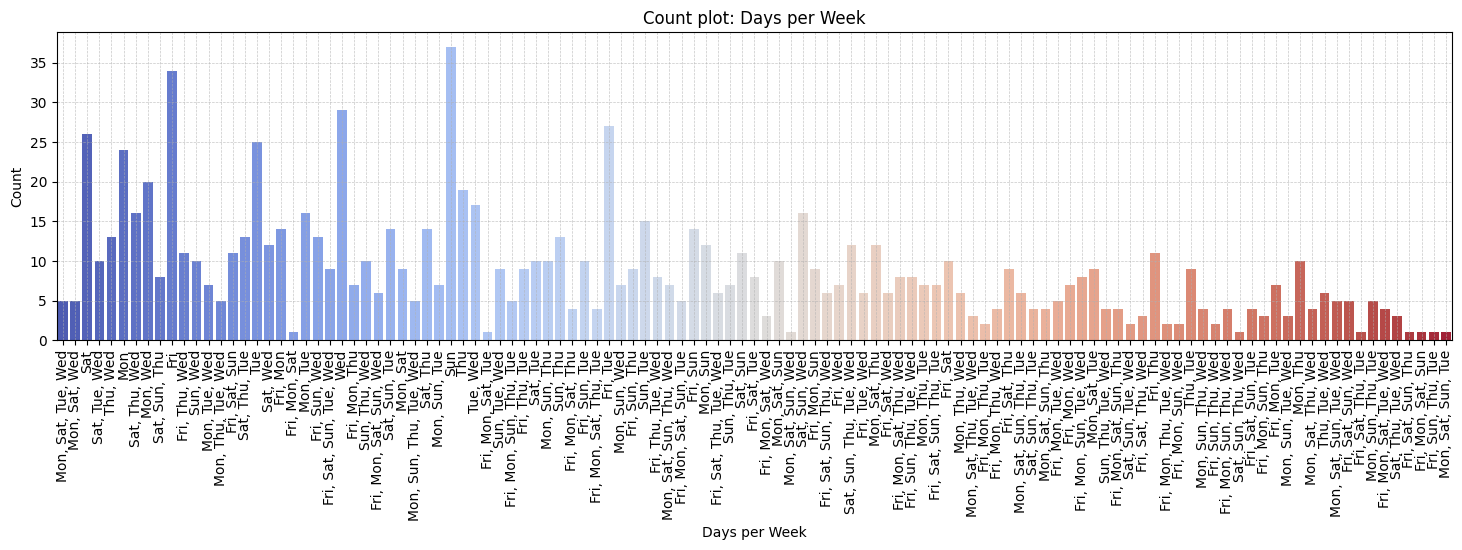

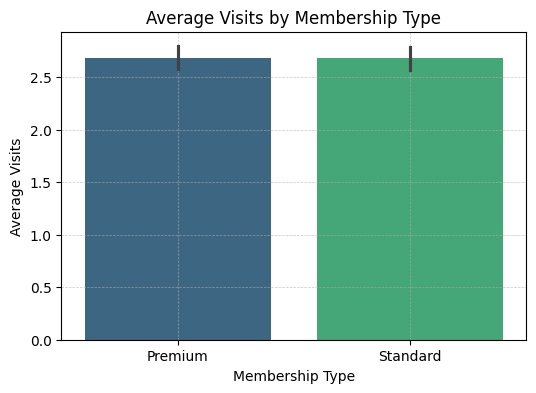

In [29]:
# 1. Box plot: Gender vs Age
# Use: sns.boxplot(data=gym, x='gender', y='Age')

# Create a seperate figure size
plt.figure(figsize = (6, 4))

# Plot data
sns.boxplot(data = gym, x = 'gender', y = 'Age', palette = 'Set2')

# Add labels and title and grid
plt.title('Gender vs Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, alpha = .7)

# Save figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Figure/gender_vs_age.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

##############################################################################
# 2. Count plot: Days per week
# Use: sns.countplot(data=gym, x='days_per_week')

#Create a seperate figure size
plt.figure(figsize = (18, 4))

# Plot data
ax = sns.countplot(data = gym, x = 'days_per_week', palette = 'coolwarm')

# Add labels and title and grid
plt.title('Count plot: Days per Week')
plt.xlabel('Days per Week')
plt.ylabel('Count')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, alpha = .7)
plt.xticks(rotation = 90)

# Save figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Figure/days_per_week.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()

#########################################################
# 3. Bar plot: Average visits by membership type
# Use: sns.barplot(data=gym, x='abonoment_type', y='visit_per_week')

# Create a seperate figure size
plt.figure(figsize = (6, 4))

# Plot data
sns.barplot(data = gym, x = 'abonoment_type', y = 'visit_per_week', palette = 'viridis')

# Add labels and title and grid
plt.title('Average Visits by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Visits')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5, alpha = .7)

# Save figure
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Data/Figure/average_visits_by_membership_type.png', dpi = 300, bbox_inches = 'tight')

# Show the plot
plt.show()
